In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [2]:
cini_colors = ['#033267', '#F1A32F']
mpl.cm.register_cmap("cdl", mpl.colors.LinearSegmentedColormap.from_list("", cini_colors))

plt.style.context('seaborn-white')
sns.set_style("whitegrid")
 
# Fonts standartisation
large = 16; med = 14; small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (16, 10),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)

In [3]:
f_name = 'df_final.gzip'

In [4]:
data_path = 'data/preprocessed/' + f_name

In [64]:
print(data_path)

../data/preprocessed/df_final.gzip


In [65]:
try:
    data = pd.read_parquet(data_path)
    print('File is read!')
except:
    print('File is not found!')

File is read!


In [6]:
data.head(5)

,session_id,sequence_order,category_a,category_b,category_c,category_d,duration,gender
0,u10001,1,1,1,1,1,0.100000,female
1,u10002,1,1,1,1,1,0.016667,female
2,u10003,12,1,1,6,12,13.983333,female
3,u10004,1,1,1,1,1,0.033333,female
4,u10005,3,1,1,2,3,3.283333,female


### Let's see the distribution of target

In [7]:
target = 'gender'

In [8]:
target_counts = data.groupby(target).count()['session_id']
target_counts.index

Index(['female', 'male'], dtype='object', name='gender')

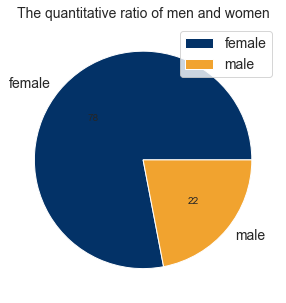

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(target_counts, labels=target_counts.index, autopct='%1.0f', colors=cini_colors)
ax.legend(loc='best');
ax.set_title('The quantitative ratio of men and women')
plt.show()

### Let's see the distribution of duration

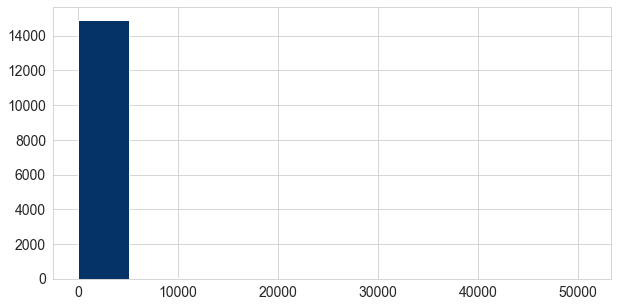

In [13]:
plt.figure(figsize=(10,5))
plt.hist(data['duration'], 10, color=cini_colors[0])
plt.show()

**Well there is some roughness in data**

**We should separate the data**

Quantiles plot

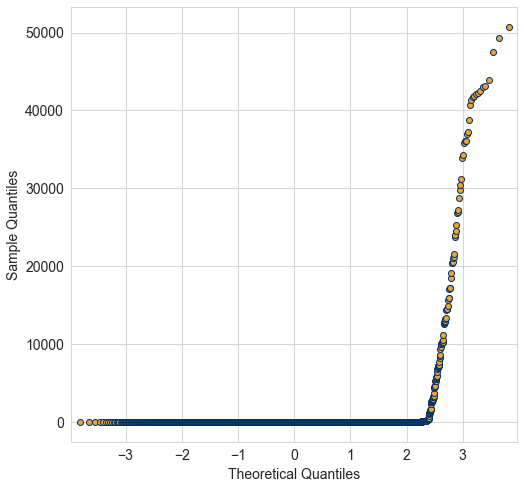

In [63]:
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111)
sm.qqplot(data['duration'], ax=ax)
ax.get_lines()[0].set_color(cini_colors[0])
ax.get_lines()[0].set_markerfacecolor(cini_colors[1])

plt.show()

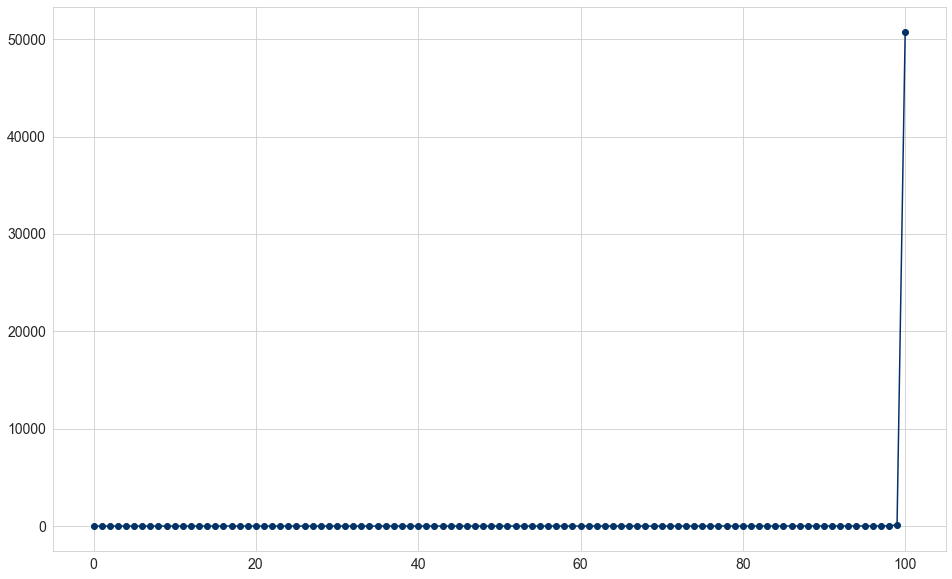

In [40]:
percs = np.linspace(0,100,101)
data_percs = np.percentile(data['duration'], percs)
plt.plot(data_percs, ls="-", marker="o", color=cini_colors[0])

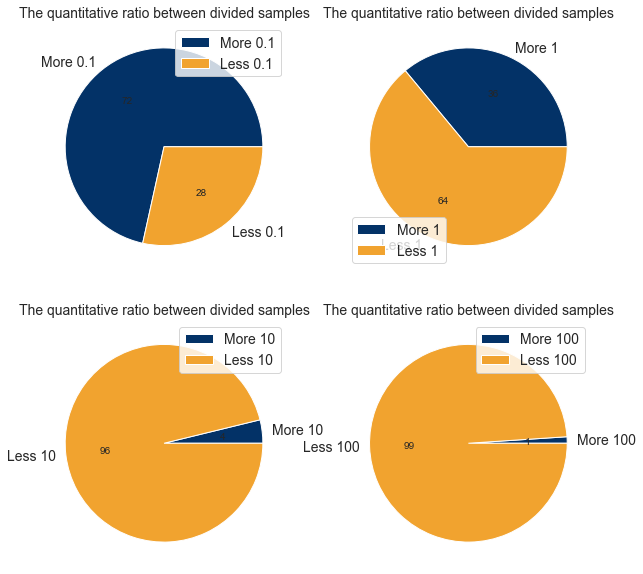

In [16]:
fig= plt.figure(figsize=(10, 10))
for i in range(0, 4):
    ax = plt.subplot(2,2, i+1)
    threshold = 10**(i-1)
    c1 = data[data['duration']>threshold]['duration'].shape[0]
    c2 = data[data['duration']<threshold]['duration'].shape[0]
    ax.pie([c1,
           c2],
           labels=['More %s'%threshold, 'Less %s'%threshold], autopct='%1.0f', colors=cini_colors)
    ax.legend(loc='best');
    ax.set_title('The quantitative ratio between divided samples')
plt.show()

**Look at avarage and median though the whole set**

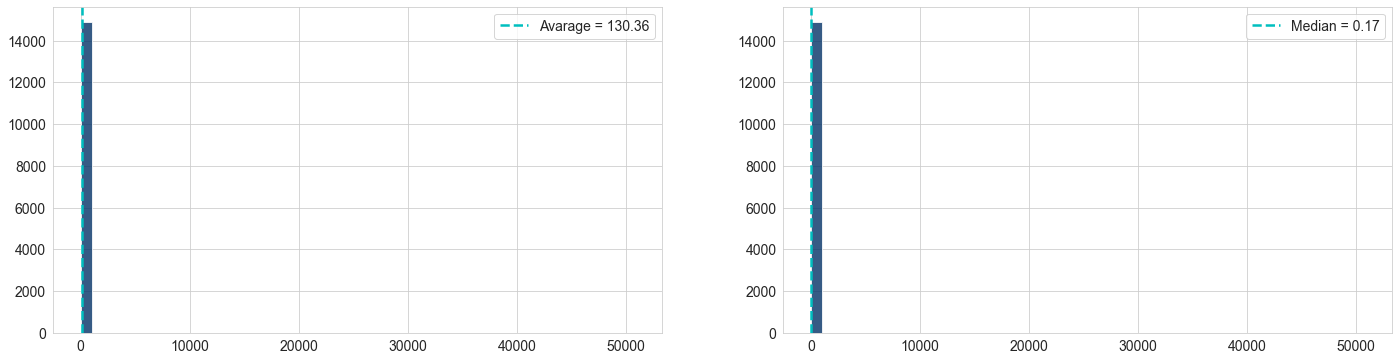

In [17]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(data['duration'], 50, alpha=0.8, color=cini_colors[0])
line1 = plt.axvline(np.mean(data['duration']),
                    label=('Avarage = '+str(round(np.mean(data['duration']), 2))),
                    color='c', linestyle='dashed', linewidth=2.5)
ax1.legend(handles=[line1])

ax2 = plt.subplot(122)
plt.hist(data['duration'], 50, alpha=0.8, color=cini_colors[0])
line2 = plt.axvline(np.median(data['duration']),
                    label=('Median = '+str(round(np.median(data['duration']), 2))),
                    color='c', linestyle='dashed', linewidth=2.5)
ax2.legend(handles=[line2])

plt.show()

Not well, take a view closely to median

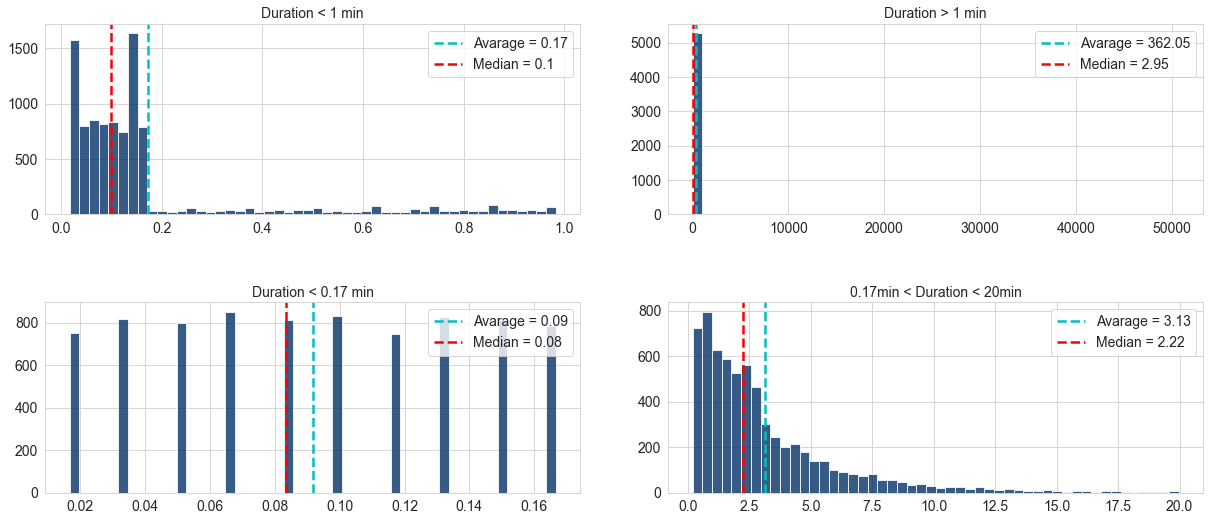

In [18]:
column = 'duration'
thresh_ = 1
fig = plt.figure(figsize=(18, 12))

data_selected = data[data[column]<thresh_][column]
ax = plt.subplot(321)
plt.hist(data_selected, 50, alpha=0.8, color=cini_colors[0])
plt.title('Duration < 1 min')
line1 = plt.axvline(np.mean(data_selected), label=('Avarage = '+
                    str(round(np.mean(data_selected), 2))),
                    color='c', linestyle='dashed', linewidth=2.5)
line2 = plt.axvline(np.median(data_selected), 
                    label=('Median = '+
                    str(round(np.median(data_selected), 2))),
                    color='r', linestyle='dashed', linewidth=2.5)
ax.legend(handles=[line1, line2])

data_selected = data[data[column]>thresh_][column]
ax = plt.subplot(322)
plt.hist(data_selected, 50, alpha=0.8, color=cini_colors[0])
plt.title('Duration > 1 min')
line1 = plt.axvline(np.mean(data_selected), label=('Avarage = '+
                    str(round(np.mean(data_selected), 2))),
                    color='c', linestyle='dashed', linewidth=2.5)
line2 = plt.axvline(np.median(data_selected), 
                    label=('Median = '+
                    str(round(np.median(data_selected), 2))),
                    color='r', linestyle='dashed', linewidth=2.5)
ax.legend(handles=[line1, line2])

thresh_ = 0.17
data_selected = data[(data[column]<thresh_)][column]
ax = plt.subplot(323)
plt.hist(data_selected, 50, alpha=0.8, color=cini_colors[0])
plt.title('Duration < 0.17 min')
line1 = plt.axvline(np.mean(data_selected), label=('Avarage = '+
                    str(round(np.mean(data_selected), 2))),
                    color='c', linestyle='dashed', linewidth=2.5)
line2 = plt.axvline(np.median(data_selected), 
                    label=('Median = '+
                    str(round(np.median(data_selected), 2))),
                    color='r', linestyle='dashed', linewidth=2.5)
ax.legend(handles=[line1, line2])


data_selected = data[(data[column]>thresh_) & (data[column]<20)][column]
ax = plt.subplot(324)
plt.hist(data_selected, 50, alpha=0.8, color=cini_colors[0])
plt.title('0.17min < Duration < 20min')
line1 = plt.axvline(np.mean(data_selected), label=('Avarage = '+
                    str(round(np.mean(data_selected), 2))),
                    color='c', linestyle='dashed', linewidth=2.5)
line2 = plt.axvline(np.median(data_selected), 
                    label=('Median = '+
                    str(round(np.median(data_selected), 2))),
                    color='r', linestyle='dashed', linewidth=2.5)
ax.legend(handles=[line1, line2])

fig.tight_layout(pad=5)
plt.show()

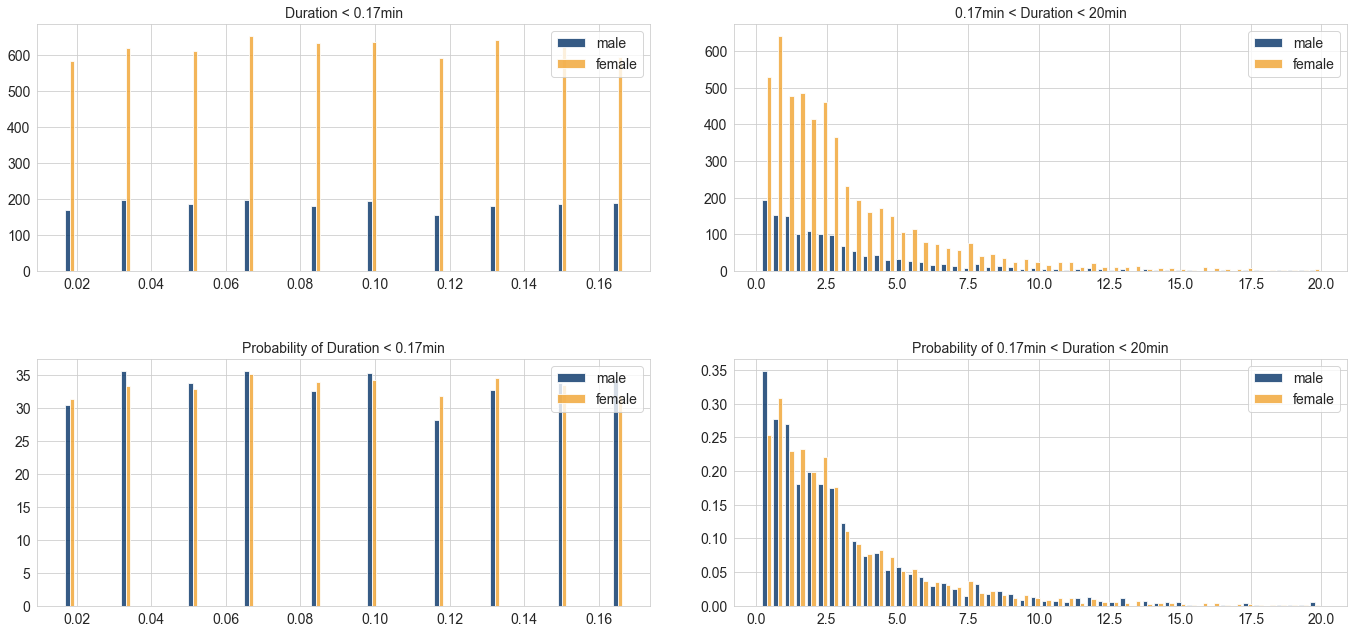

In [20]:
thresh_ = 0.17

fig = plt.figure(figsize=(20, 10))

men = data[data['gender']=='male']
women = data[data['gender']=='female']
labels = ['male', 'female']

data_men = men[men[column]<0.17][column]
data_women = women[women[column]<0.17][column]
data_selected = [data_men, data_women]
ax = plt.subplot(221)

plt.hist(data_selected, 50, alpha=0.8, color=cini_colors, label=labels)
plt.title('Duration < 0.17min')
plt.legend()

data_men = men[(men[column]>thresh_) & (men[column]<20)][column]
data_women = women[(women[column]>thresh_) & (women[column]<20)][column]
data_selected = [data_men, data_women]
ax = plt.subplot(222)

plt.hist(data_selected, 50, alpha=0.8, color=cini_colors, label=labels)
plt.title('0.17min < Duration < 20min')
plt.legend()

# Probability

data_men = men[men[column]<0.17][column]
data_women = women[women[column]<0.17][column]

data_selected = [data_men, data_women]
ax = plt.subplot(223)

plt.hist(data_selected, 50, density=True, alpha=0.8,
         color=cini_colors, label=labels)
plt.title('Probability of Duration < 0.17min')
plt.legend()

data_men = men[(men[column]>thresh_) & (men[column]<20)][column]
data_women = women[(women[column]>thresh_) & (women[column]<20)][column]

data_selected = [data_men, data_women]
ax = plt.subplot(224)

plt.hist(data_selected, 50, density=True, alpha=0.8,
         color=cini_colors, label=labels)
plt.title('Probability of 0.17min < Duration < 20min')
plt.legend()

fig.tight_layout(pad=5)
plt.show()

Distributions are similar enough to each other

In [21]:
left_men = men[men[column]<0.17][column]
left_women = women[women[column]<0.17][column]

right_men = men[(men[column]>0.17) & (men[column]<20)][column]
right_women = women[(women[column]>0.17) & (women[column]<20)][column]

### Correlation analysis

In [27]:
data.corr(method ='pearson')

,sequence_order,category_a,category_b,category_c,category_d,duration
sequence_order,1.000000,0.183742,0.397963,0.622039,1.000000,0.004618
category_a,0.183742,1.000000,0.519689,0.361064,0.183742,0.112769
category_b,0.397963,0.519689,1.000000,0.705707,0.397963,0.105530
category_c,0.622039,0.361064,0.705707,1.000000,0.622039,0.059603
category_d,1.000000,0.183742,0.397963,0.622039,1.000000,0.004618
duration,0.004618,0.112769,0.105530,0.059603,0.004618,1.000000


<AxesSubplot:>

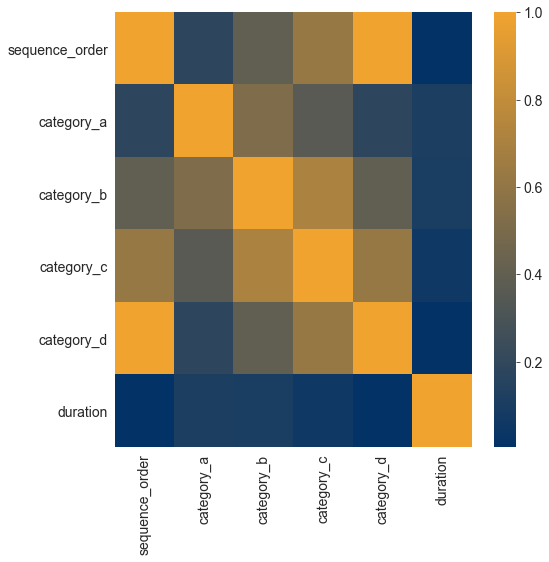

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(_, cmap='cdl')

**Now we see that droping 'sequence_order' is safety**

In [29]:
data = data.drop('sequence_order', axis=1)

In [30]:
data.head()

,session_id,category_a,category_b,category_c,category_d,duration,gender
0,u10001,1,1,1,1,0.100000,female
1,u10002,1,1,1,1,0.016667,female
2,u10003,1,1,6,12,13.983333,female
3,u10004,1,1,1,1,0.033333,female
4,u10005,1,1,2,3,3.283333,female


## Statistical hypothesis 

 <hr/>
 0 - Distribution of session's duration is the same amongst men and women
 <hr/>
 1 - Distribution of session's duration is different amongst men and women
 <hr/>

In [31]:
from scipy import stats

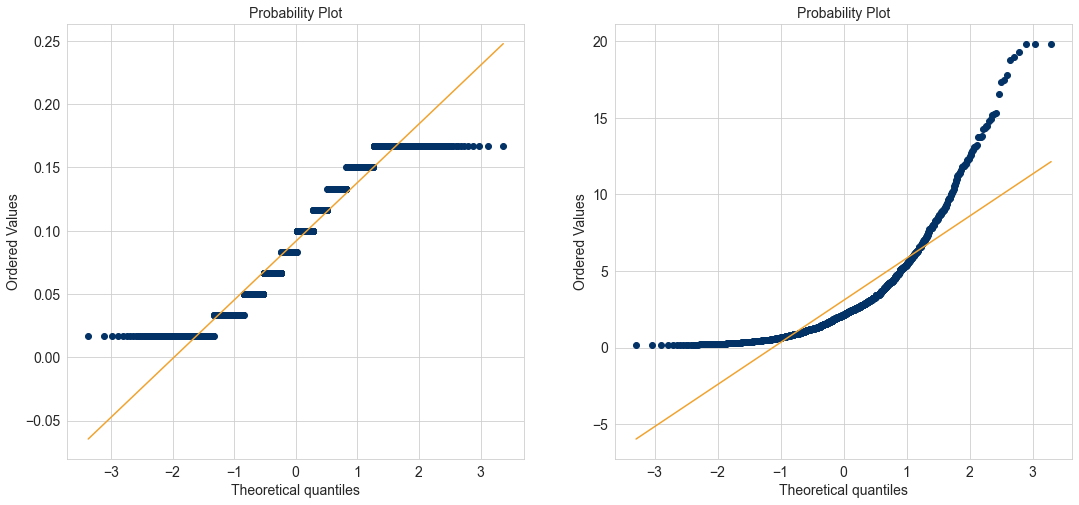

In [32]:
fig = plt.figure(figsize=(18, 8))

ax = fig.add_subplot(121)
stats.probplot(left_men, dist = "norm", plot = ax)
ax.get_lines()[0].set_color(cini_colors[0])
ax.get_lines()[1].set_color(cini_colors[1])

ax = fig.add_subplot(122)
stats.probplot(right_men, dist = "norm", plot = ax)
ax.get_lines()[0].set_color(cini_colors[0])
ax.get_lines()[1].set_color(cini_colors[1])
plt.show()

In [33]:
stats.shapiro(right_men)

ShapiroResult(statistic=0.7797424793243408, pvalue=8.893971288146398e-40)

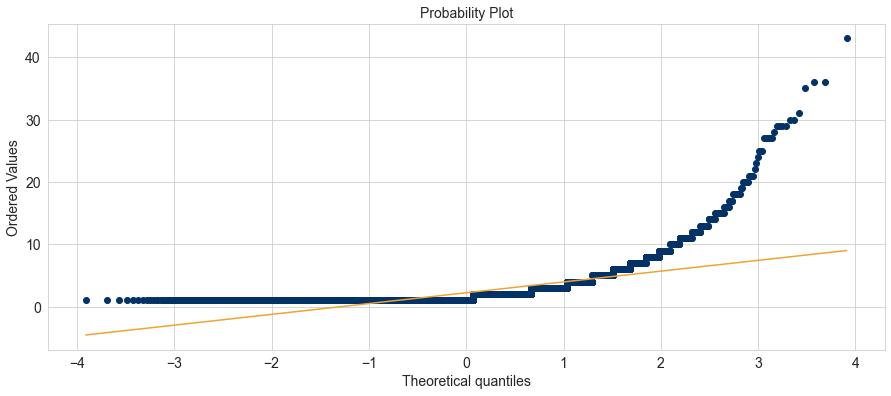

In [34]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(111)
stats.probplot(data['category_d'], dist = "norm", plot = ax)
ax.get_lines()[0].set_color(cini_colors[0])
ax.get_lines()[1].set_color(cini_colors[1])

plt.show()

Student test, despite there is no gauss distribution

In [35]:
t_stat = stats.ttest_ind(men['duration'], women['duration'])
t_stat

Ttest_indResult(statistic=-0.29227937558435274, pvalue=0.7700770694627431)

Let's use Kruskal criterion for samples with different size 

<BarContainer object of 5 artists>

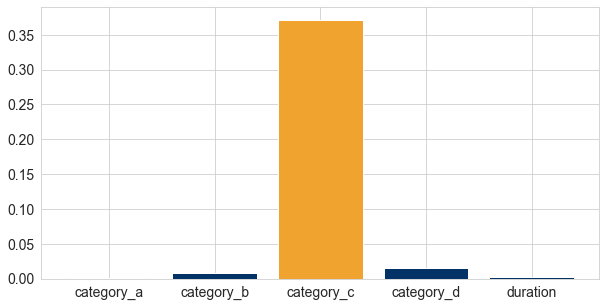

In [36]:
p_ = []
name_col = men.columns[2:7]
color = []
for i in range(2, 7):
    stat_p =stats.kruskal(men.iloc[:, i], women.iloc[:, i])[1]
    p_.append(stat_p)
    color.append(cini_colors[bool(stat_p>0.05)])
plt.figure(figsize=(10,5))
plt.bar(name_col, p_, color=color)

As we can conclude, the distributions are different for all features except category_c